# Tugas Kecil 1 Machine Learning
Dataset breast cancer

## Import semua library yang diperlukan

agak banyak library yang diminta, dimaklumin

In [1]:
import pandas as pd
import sklearn
import sklearn.datasets
import sklearn.model_selection
import sklearn.metrics

## Import dataset yang digunakan

In [2]:
breast_cancer = sklearn.datasets.load_breast_cancer()

## Make dataframe for given dataset

In [3]:
df_breast_cancer = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df_breast_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df_breast_cancer.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

## Feature engineering
umm.. apa yang mau dicari?

In [5]:
X, y = sklearn.datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=0)

## Training
### Decision Tree

[Text(187.32857142857142, 205.35999999999999, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(119.57142857142857, 181.2, 'X[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(79.71428571428572, 157.04, 'X[13] <= 42.19\ngini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(47.82857142857143, 132.88, 'X[25] <= 0.454\ngini = 0.032\nsamples = 247\nvalue = [4, 243]'),
 Text(31.885714285714286, 108.72, 'X[21] <= 30.145\ngini = 0.024\nsamples = 246\nvalue = [3, 243]'),
 Text(15.942857142857143, 84.56, 'gini = 0.0\nsamples = 215\nvalue = [0, 215]'),
 Text(47.82857142857143, 84.56, 'X[14] <= 0.004\ngini = 0.175\nsamples = 31\nvalue = [3, 28]'),
 Text(31.885714285714286, 60.400000000000006, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(63.77142857142857, 60.400000000000006, 'X[1] <= 23.2\ngini = 0.067\nsamples = 29\nvalue = [1, 28]'),
 Text(47.82857142857143, 36.24000000000001, 'X[1] <= 22.385\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(31.

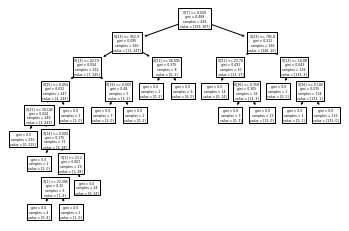

In [6]:
from sklearn import tree
clf1 = tree.DecisionTreeClassifier()
clf1 = clf1.fit(X_train, y_train)
tree.plot_tree(clf1) 

In [7]:
print("Training set score: %f" % clf1.score(X_train, y_train))
print("Test set score: %f" % clf1.score(X_test, y_test))

Training set score: 1.000000
Test set score: 0.916084


In [8]:
print("Accuracy score: %f" % sklearn.metrics.accuracy_score(y_test, clf1.predict(X_test)))
print("F1 Score : %f" % sklearn.metrics.f1_score(y_test, clf1.predict(X_test),average='weighted'))

Accuracy score: 0.916084
F1 Score : 0.917077


### Id3Estimator

In [9]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

In [25]:
import id3
estimator = id3.Id3Estimator()
estimator = estimator.fit(X_train, y_train)
tree = id3.export_graphviz(estimator.tree_, 'tree.dot', breast_cancer.feature_names)
# file dot bisa dibuka pake graphviz

In [26]:
# TODO : prediction and score
print("Accuracy score: %f" % sklearn.metrics.accuracy_score(y_test, estimator.predict(X_test)))
print("F1 Score : %f" % sklearn.metrics.f1_score(y_test, estimator.predict(X_test),average='weighted'))

Accuracy score: 0.944056
F1 Score : 0.944437


### KMeans

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2).fit(df_breast_cancer)

centroids = kmeans.cluster_centers_
print(centroids)

[[1.25562991e+01 1.85703653e+01 8.11234703e+01 4.96061872e+02
  9.48844977e-02 9.10998174e-02 6.24377642e-02 3.34325434e-02
  1.78057991e-01 6.34540183e-02 3.04190868e-01 1.21515320e+00
  2.15288059e+00 2.37852922e+01 7.17326256e-03 2.34746895e-02
  2.87455128e-02 1.06363242e-02 2.06135799e-02 3.74750297e-03
  1.40439018e+01 2.47095434e+01 9.19375114e+01 6.19647945e+02
  1.29959110e-01 2.23311758e-01 2.19214947e-01 9.13298425e-02
  2.83553653e-01 8.32819406e-02]
 [1.93799237e+01 2.16945802e+01 1.28231298e+02 1.18592977e+03
  1.01294580e-01 1.48612977e-01 1.76939466e-01 1.00698779e-01
  1.91539695e-01 6.06029008e-02 7.42803817e-01 1.22253817e+00
  5.25058015e+00 9.56781679e+01 6.59868702e-03 3.21766947e-02
  4.24197710e-02 1.56739847e-02 2.03039695e-02 3.95338931e-03
  2.37094656e+01 2.89126718e+01 1.58496183e+02 1.75302290e+03
  1.40424733e-01 3.57757710e-01 4.49306107e-01 1.92431069e-01
  3.11881679e-01 8.61654962e-02]]


In [23]:
print("Accuracy score: %f" % sklearn.metrics.accuracy_score(y_test, kmeans.predict(X_test)))
print("F1 Score : %f" % sklearn.metrics.f1_score(y_test, kmeans.predict(X_test),average='weighted'))

Accuracy score: 0.153846
F1 Score : 0.098834


### Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
clf3 = LogisticRegression(random_state=0).fit(X_train, y_train)

In [15]:
print("Training set score: %f" % clf3.score(X_train, y_train))
print("Test set score: %f" % clf3.score(X_test, y_test))

Training set score: 0.946009
Test set score: 0.944056


In [16]:
print("Accuracy score: %f" % sklearn.metrics.accuracy_score(y_test, clf3.predict(X_test)))
print("F1 Score : %f" % sklearn.metrics.f1_score(y_test, clf3.predict(X_test),average='weighted'))

Accuracy score: 0.944056
F1 Score : 0.944437


### Neural Network

In [17]:
from sklearn.neural_network import MLPClassifier
clf4 = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

In [18]:
print("Training set score: %f" % clf4.score(X_train, y_train))
print("Test set score: %f" % clf4.score(X_test, y_test))

Training set score: 0.927230
Test set score: 0.895105


In [19]:
print("Accuracy score: %f" % sklearn.metrics.accuracy_score(y_test, clf4.predict(X_test)))
print("F1 Score : %f" % sklearn.metrics.f1_score(y_test, clf4.predict(X_test),average='weighted'))

Accuracy score: 0.895105
F1 Score : 0.896232


### SVM

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf5 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf5.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [21]:
print("Training set score: %f" % clf5.score(X_train, y_train))
print("Test set score: %f" % clf5.score(X_test, y_test))

Training set score: 0.985915
Test set score: 0.965035


In [22]:
print("Accuracy score: %f" % sklearn.metrics.accuracy_score(y_test, clf5.predict(X_test)))
print("F1 Score : %f" % sklearn.metrics.f1_score(y_test, clf5.predict(X_test),average='weighted'))

Accuracy score: 0.965035
F1 Score : 0.964965
